# Aribnb Data Analysis: Seattle and Boston
## Udacity Data Scientist Nanodegree Project 1

## Questions:

### - Q1: How is the price variation throughout the year? Which month is the most expensive one to rent a room?
### - Q2: The prices behave in the say manner in both cities (according to Q1)?
### - Q3: Wich city is more expensive (higher avarege price): Boston or Seattle?
### - Q4: Can the price be predicted using the data provided?


In [67]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

## Seattle Airbnb Data

In [2]:
sea_list = pd.read_csv('./Data/Airbnb/Seattle/listings.csv')
sae_cal = pd.read_csv('./Data/Airbnb/Seattle/calendar.csv')

## Question 1: How is the price variation throughout the year? Which month is the most expensive one to rent a room?

### Analysing the calendar database

In [3]:
sae_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# Creating a dataset only with the registers that have a price
sea_cal_pr = sae_cal[sae_cal['available'] == 't']

# Obtaining the month and year of each date and saving it as a new feature
sea_cal_pr['month'] = sea_cal_pr['date'].apply(lambda z: z.split('-')[1])

sea_cal_pr.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,01
1,241032,2016-01-05,t,$85.00,01
9,241032,2016-01-13,t,$85.00,01
10,241032,2016-01-14,t,$85.00,01
14,241032,2016-01-18,t,$85.00,01


In [5]:
# Droping the id and avaiable columns and changing the type of the price column to float
sea_cal_pr = sea_cal_pr.drop(columns = ['listing_id', 'available'])
sea_cal_pr['price'] = sea_cal_pr['price'].apply(lambda x: x.replace('$', '')).apply(lambda y: y.replace(',', '')).astype(float)

# Obtaining the average price for each day
sea_cal_pr_month = sea_cal_pr.groupby(['month']).mean()
sea_cal_pr_month

,price
month,
01,122.912176
02,124.293927
03,128.644488
04,135.097005
05,139.538183
06,147.473137
07,152.094150
08,150.656594
09,143.255949


### Checking the price distribuition 

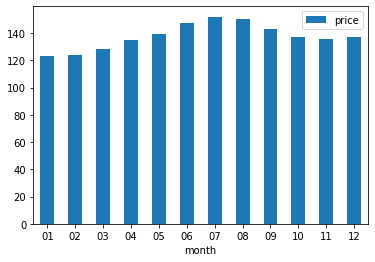

In [6]:
sea_cal_pr_month.plot.bar(rot=0);

## Answer to Q1:

### This graph shows us an important information: the prices begin to rise when summer is approaching (June, July and August), reaching maximum value  in July. It makes sense because a lot of people usually travel in their summer vacation. 

### After the summer, the prices tend to reduce. 



## Question 2: The prices behave in the say manner in both cities?

### To answer this question we will analyse the Boston dataset

In [90]:
bos_cal = pd.read_csv('./Data/Airbnb/Boston/calendar.csv')

In [92]:
bos_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [93]:
# Creating a dataset only with the registers that have a price
bos_cal_pr = bos_cal[bos_cal['available'] == 't']

# Obtaining the month and year of each date and saving it as a new feature
bos_cal_pr['month'] = bos_cal_pr['date'].apply(lambda z: z.split('-')[1])

bos_cal_pr.head()

,listing_id,date,available,price,month
365,3075044,2017-08-22,t,$65.00,08
366,3075044,2017-08-21,t,$65.00,08
367,3075044,2017-08-20,t,$65.00,08
368,3075044,2017-08-19,t,$75.00,08
369,3075044,2017-08-18,t,$75.00,08


In [94]:
# Aplying the same transformations to this dataset
# Droping the id and avaiable columns and changing the type of the price column to float
bos_cal_pr = bos_cal_pr.drop(columns = ['listing_id', 'available'])
bos_cal_pr['price'] = bos_cal_pr['price'].apply(lambda x: x.replace('$', '')).apply(lambda y: y.replace(',', '')).astype(float)

# Obtaining the average price for each day
bos_cal_pr_month = bos_cal_pr.groupby(['month']).mean()
bos_cal_pr_month

,price
month,
01,182.799671
02,180.961028
03,181.818742
04,197.252890
05,193.712295
06,196.535302
07,202.486309
08,203.330142
09,237.047727


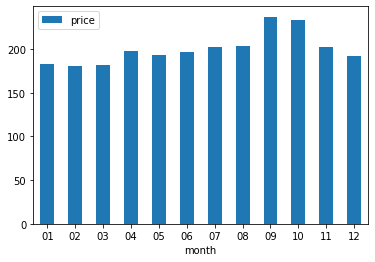

In [95]:
bos_cal_pr_month.plot.bar(rot=0);

## Answer to Q2:

### This other graph shows us that the tourism rates in both cities behave differently. While in Seattle the prices tend to rise in June, July and August, it's clear that for Boston the months where the prices for renting  are higher are September and October. 

## Question 3: Wich city is more expensive (higher avarege price): Boston or Seattle?

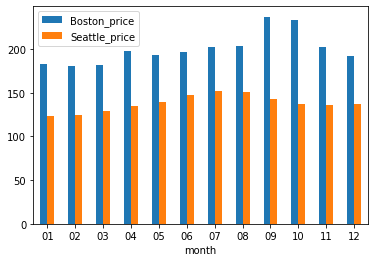

In [146]:
# Creating a single dataset with the prices for each city
bos_compare = bos_cal_pr_month.rename(columns = {'price': 'Boston_price'})
sea_compare = sea_cal_pr_month.rename(columns = {'price': 'Seattle_price'})

#Generating the graph comparing the prices in the two cities
df_compare = pd.concat([bos_compare, sea_compare], axis=1)
df_compare.plot.bar(rot=0);

## Answer to Q3:

### The graph clearly shows that the prices for renting a room in Airbnb in Boston are higher throughout the year.

In [7]:
sea_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
sea_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### A first analysis show us that:
- Some features (like the url or the ID of the review) don't aggregate information to predict a value
- Some informations (like square_feet) have too much null values

These columns will be discarded 

In [194]:
desired_columns = [
    'summary',
    'space', 
    'description',  
    'neighborhood_overview', 
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'neighbourhood_group_cleansed',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'bed_type',
    'amenities',
    'security_deposit',
    'cleaning_fee',
    'guests_included',
    'extra_people',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'cancellation_policy',
    'price'
]

In [202]:
df_list = sea_list[desired_columns]

In [203]:
df_list.head()

,summary,space,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_group_cleansed,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,price
0,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,within a few hours,96%,100%,Queen Anne,Apartment,Entire home/apt,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,$85.00
1,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",within an hour,98%,100%,Queen Anne,Apartment,Entire home/apt,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,$150.00
2,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,within a few hours,67%,100%,Queen Anne,House,Entire home/apt,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,$975.00
3,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,NaN,Queen Anne,Apartment,Entire home/apt,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,$100.00
4,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,within an hour,100%,NaN,Queen Anne,House,Entire home/apt,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,$450.00


In [204]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   summary                       3641 non-null   object 
 1   space                         3249 non-null   object 
 2   description                   3818 non-null   object 
 3   neighborhood_overview         2786 non-null   object 
 4   host_response_time            3295 non-null   object 
 5   host_response_rate            3295 non-null   object 
 6   host_acceptance_rate          3045 non-null   object 
 7   neighbourhood_group_cleansed  3818 non-null   object 
 8   property_type                 3817 non-null   object 
 9   room_type                     3818 non-null   object 
 10  accommodates                  3818 non-null   int64  
 11  bathrooms                     3802 non-null   float64
 12  bedrooms                      3812 non-null   float64
 13  bed

### Working with categorical features

In [205]:
def check_for_values(df, features_names):
    '''
    Info:
        This function replaces the values in the features_names column with 0 (if null) or 1 
    -----------
    Input:
        df: Dataframe used (type: pandas Dataframe)
        feature_name: Names of the columns to be transformed (type: list)
    -----------
    Output:
        df : Dataframe after the transformations
    '''
    for feature in features_names:
        df[feature].loc[~df[feature].isnull()] = 1
        df[feature].loc[df[feature].isnull()] = 0 
        df[feature] = df[feature].astype(int)
        
    return df
     
def transf_categorical(df, column_names):
    '''
    Info:
        This function creates categorical columns with boolean columns for each possible value for each feature and drops the
        original column from the dataframe
    -----------
    Input:
        df: Dataframe used (type: pandas Dataframe)
        column_names: Names of the columns to be transformed (type: list)
    -----------
    Output:
        df: Dataframe after the addition of the new columns and removal of the old ones
    '''
    for col in column_names:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
        except:
            continue
        
    df.columns.str.replace(' ','_')

    return df

def get_amenities(df):
    '''
    Info:
        This function creates new columns with information provided in the amenities column
    -----------
    Input:
        df: Dataframe used (type: pandas Dataframe)
    -----------
    Output:
        df_f: Dataframe with the new columns
    '''
    
    df['amenities'] = df['amenities'].str.replace('{','')
    df['amenities'] = df['amenities'].str.replace('}','')
    list_amenities = []
    
    # Getting all the possible values
    for amenities in df['amenities']:
        aux = amenities.split(',')

        # Save each item in the list
        for element in aux:
            list_amenities.append(element.replace('"', ''))

    set_amenities = set(list_amenities)
    set_amenities.remove("")
    
    # Creating and filling the columns for each item, according to the items present in the amenities column
    L = []
    for row in df['amenities']:
        row_amenities = row.replace('"', '').split(',')

        l = {}
        for elem in set_amenities:
            if elem in row_amenities:
                l[elem] = 1
            else:
                l[elem] = 0
        L.append(l)
    
    df_am = pd.DataFrame(data = L)
    df_f = pd.concat([df, df_am], axis=1)
    df_f = df_f.drop(columns = ['amenities'])
    return df_f

In [206]:
# Columns to check if the host provided the information
columns_check = [
    'summary',
    'space',
    'description',
    'neighborhood_overview',
    'security_deposit',
    'cleaning_fee',
    'extra_people'
]

# Categorical columns to be treated
columns_cat = [
    'host_response_time',
    'neighbourhood_group_cleansed',
    'property_type',
    'room_type',
    'bed_type',
    'cancellation_policy'
]

# Changing the rates and price from string to float
df_list['host_response_rate'] = df_list['host_response_rate'].str.replace('%', '').astype(float)
df_list['host_acceptance_rate'] = df_list['host_acceptance_rate'].str.replace('%', '').astype(float)
df_list['price'] = df_list['price'].str.replace('$', '')
df_list['price'] = df_list['price'].str.replace(',', '').astype(float)

# Dealing with the categorical data
df_cat_check = check_for_values(df_list,columns_check)
df_cat = transf_categorical(df_cat_check, columns_cat)


#df_final = get_amenities(df_cat)
df_final = df_cat.drop(columns = ['amenities'])

### Finally, the remaining null values will be dealt with. One set will remove the null values and another set will substitute the null values with the mean of the column.

In [207]:
# Removing the rows with null values
df_final_1 = df_final.dropna()
df_final_1

,summary,space,description,neighborhood_overview,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,0,1,1,0,96.0,100.0,4,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
1,1,1,1,1,98.0,100.0,4,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,1
2,1,1,1,1,67.0,100.0,11,4.5,5.0,7.0,...,0,0,0,0,0,0,0,1,0,1
6,1,1,1,1,100.0,100.0,2,1.0,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0
7,1,1,1,1,100.0,100.0,2,1.0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,1,1,1,1,100.0,100.0,5,1.0,2.0,3.0,...,0,0,0,0,0,0,0,1,0,1
3811,1,1,1,1,100.0,100.0,3,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
3812,1,1,1,1,100.0,100.0,4,1.0,1.0,2.0,...,0,0,0,0,0,0,0,1,1,0
3813,1,1,1,1,99.0,100.0,6,2.0,3.0,3.0,...,0,0,0,0,0,0,0,1,0,1


A lot of data was lost removing the null values, let's see how this impact on the development of the model.

In [208]:
# Replacing the null values with the mean 
# Fill numeric columns with the mean
df_final_2 = df_final
num_vars = df_final_2.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_final_2[col].fillna((df_final_2[col].mean()), inplace=True)
    
df_final_2

,summary,space,description,neighborhood_overview,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,...,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,0,1,1,0,96.000000,100.000000,4,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
1,1,1,1,1,98.000000,100.000000,4,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,1
2,1,1,1,1,67.000000,100.000000,11,4.5,5.0,7.0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,1,0,94.886798,99.967159,3,1.0,0.0,2.0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1,100.000000,99.967159,6,2.0,3.0,3.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1,1,1,1,99.000000,100.000000,6,2.0,3.0,3.0,...,0,0,0,0,0,0,0,1,0,1
3814,1,1,1,1,100.000000,100.000000,4,1.0,1.0,2.0,...,0,0,0,0,0,0,0,1,1,0
3815,1,0,1,0,94.886798,99.967159,2,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
3816,1,1,1,1,100.000000,99.967159,2,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,1,0


### Model Development

In [209]:
# Separating the label from the rest of the data
y1 = df_final_1['price']
X1 = df_final_1.drop(['price'], axis= 1)


y2 = df_final_2['price']
X2 = df_final_2.drop(['price'], axis= 1)

# Splitting the data into training and test sets (70% train and 30% test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [210]:
# Creating the Linear Regression model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train1, y_train1) #Fit

# Predicting
y_test_preds1 = lm_model.predict(X_test1)
y_train_preds1 = lm_model.predict(X_train1)

# Obtaining the score
test_score1 = r2_score(y_test1, y_test_preds1)
train_score1 = r2_score(y_train1, y_train_preds1)

print(f'Train score dropping the null values: {train_score1}\nTest score dropping the null values: {test_score1}')

Train score dropping the null values: 0.6673994948785666
Test score dropping the null values: 0.5815321330069569


In [211]:
# Creating the Linear Regression model
lm_model2 = LinearRegression(normalize=True) # Instantiate
lm_model2.fit(X_train2, y_train2) #Fit

# Predicting
y_test_preds2 = lm_model2.predict(X_test2)
y_train_preds2 = lm_model2.predict(X_train2)

# Obtaining the score}
test_score2 = r2_score(y_test2, y_test_preds2)
train_score2 = r2_score(y_train2, y_train_preds2)

print(f'Train score dropping the null values: {train_score2}\nTest score dropping the null values: {test_score2}')

Train score dropping the null values: 0.592635446506073
Test score dropping the null values: -734.0978987076562
